# Chapter 4 – Training Linear Models

In [1]:
import sklearn
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)

## Linear Regression with Normal Equation

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.rand(100,1)

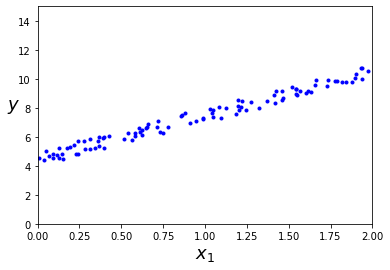

In [3]:
plt.plot(X, y, "b.") # we need the dots
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

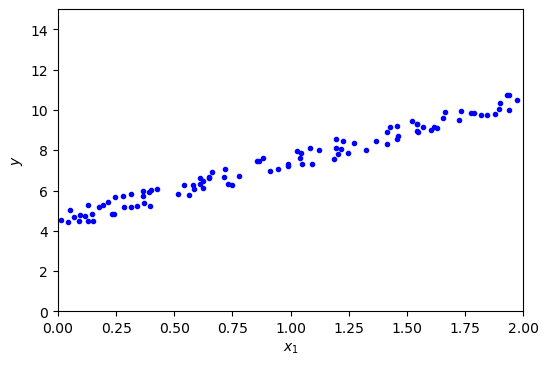

In [4]:
# xb
_, ax = plt.subplots(figsize=(6, 4), dpi=100)


ax.plot(X, y, "b.")
ax.axis([0, 2, 0, 15])
ax.set(xlabel="$x_1$", ylabel="$y$")
plt.show()

In [5]:
X_b = np.c_[np.ones((100,1)),X]#add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # try more

In [6]:
theta_best

array([[4.51359766],
       [2.98323418]])

In [7]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]   # add x0 = 1 to each instance

In [8]:
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.51359766],
       [10.48006601]])

(0.0, 2.0, 0.0, 15.0)

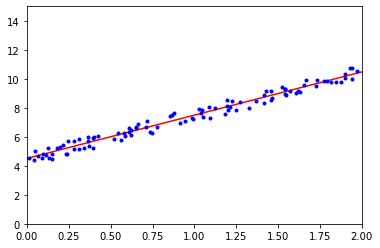

In [9]:
plt.plot(X_new,y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

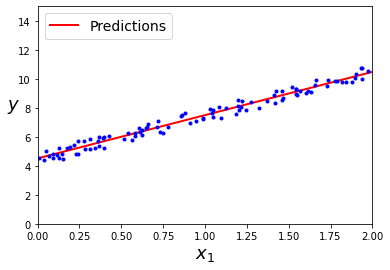

In [10]:
plt.plot(X_new, y_predict,"r-", linewidth=2,label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

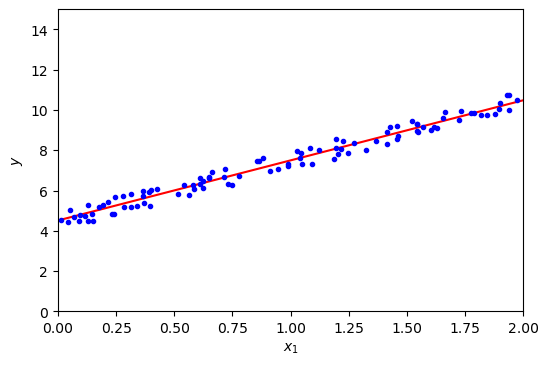

In [11]:
#xb
_,ax = plt.subplots(figsize=(6,4),dpi=100)

ax.plot(X_new, y_predict,"r-")
ax.plot(X,y,"b.")
ax.set(xlabel="$x_1$",ylabel="$y$")
ax.axis([0, 2, 0, 15])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_, theta_best

(array([4.51359766]),
 array([[2.98323418]]),
 array([[4.51359766],
        [2.98323418]]))

In [14]:
lin_reg.predict(X_new), y_predict

(array([[ 4.51359766],
        [10.48006601]]),
 array([[ 4.51359766],
        [10.48006601]]))

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` function (the name stands for "least squares"), which you could call directly:

In [15]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.51359766],
       [2.98323418]])

This function computes $\mathbf{X}^+\mathbf{y}$, where $\mathbf{X}^{+}$ is the _pseudoinverse_ of $\mathbf{X}$ (specifically the Moore-Penrose inverse). You can use `np.linalg.pinv()` to compute the pseudoinverse directly:

In [16]:
np.linalg.pinv(X_b).dot(y)

array([[4.51359766],
       [2.98323418]])

## Linear regression using batch gradient descent

In [17]:
eta = 0.1 # learning rate
n_iterations = 1000
m =100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2 / m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [18]:
theta

array([[4.51359766],
       [2.98323418]])

In [19]:
X_new_b.dot(theta)

array([[ 4.51359766],
       [10.48006601]])

In [20]:
# Batch Gradient Descent by xb
theta_path_bgd = []
m = len(X_b)

def plot_gradient_descent(theta, eta, ax, theta_path=None):
    ax.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            ax.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta -= eta * gradients
        # equals to : theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    ax.axis([0, 2, 0, 15])
    ax.set(xlabel="$x_1$",
           title=f"$\eta = {eta}$")

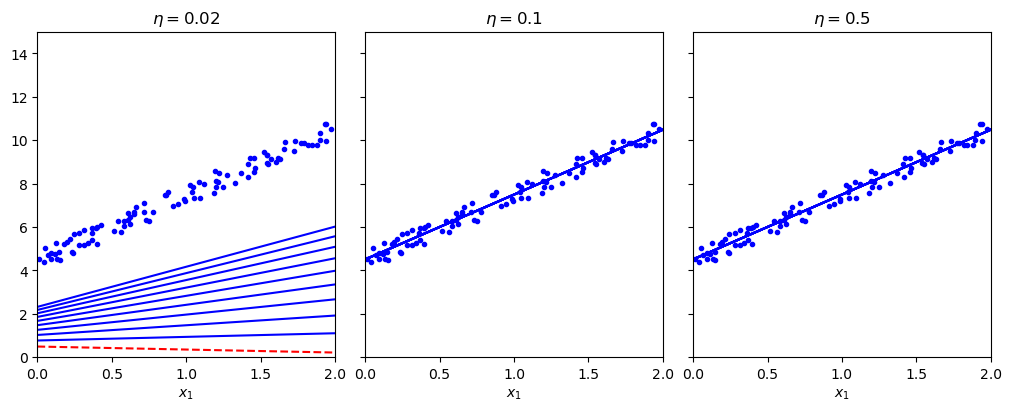

In [21]:
np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

_, axes = plt.subplots(1,3,figsize=(10, 4),dpi=100,
                     sharey=True,constrained_layout=True)

etas = [.02, .1, .5]
theta_paths = [None, theta_path_bgd, None]

for ax, eta, theta_path in zip(axes.flatten(), etas, theta_paths):
    plot_gradient_descent(theta, eta=eta, ax=ax, theta_path=theta_path)

plt.show()

In [22]:
# try

In [23]:
len(X_b)

100

In [24]:
theta_path_bgd = []
n_iterations = 1000
m = len(X_b)
eta = (0.02,0.1,0.3,0.5)

for iteration in range(n_iterations):
    if iteration < 10:
        y_predict = X_new_b.dot(theta)
    gradients = 2/m * X_b.T.dot(X_b.dot(theta)- y)
    theta =  theta - eta * gradients

In [25]:
theta

array([[4.51359766, 4.51359766, 4.51359766, 4.51359766],
       [2.98323418, 2.98323418, 2.98323418, 2.98323418]])

## Stochastic Gradient Descent

$Stochastic\ Gradient\ Descent$ picks a random instance in the training set at every step and computes the gradients based only on that single instance.

In [26]:
np.random.seed(42)

theta_path_sgd = []
m = len(X_b)
random_index = np.random.randint(m)
theta = np.random.randn(2, 1)  # random initialization

In [27]:
n_epochs = 50
t_0, t_1 = 5, 50 # learning schedule hyperparameters

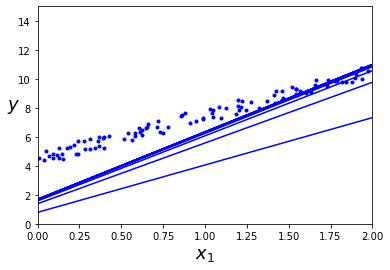

In [28]:
def learning_schedule(t):
    return t_0 / (t + t_1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    # not shown in the book
            y_predict = X_new_b.dot(theta)           # not shown
            style = "b-" if i > 0 else "r--"         # not shown
            plt.plot(X_new, y_predict, style)        # not shown
        x_i = X_b[random_index:random_index+1]
        y_i = y[random_index:random_index+1]
        gradients = 2 * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 # not shown

        
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
plt.show()                                           # not shown

In [29]:
theta

array([[1.68181717],
       [4.64987512]])

In [30]:
from sklearn.linear_model import SGDRegressor

In [31]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3,
                       penalty=None, eta0=0.1, 
                       random_state=42)
sgd_reg.fit(X, y .ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [32]:
sgd_reg.intercept_,sgd_reg.coef_

(array([4.51603434]), array([3.00059188]))

## Mini-batch gradient descent

In [33]:
theta_path_mgd = []
# m = len(X_b)
n_iterations = 50
minibathch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1) # random initialization
shuffled_indices = np.random.permutation(m)

# theta
# shuffled_indices

In [34]:
t_0, t_1 = 200, 1000


def learning_schedule(m):
    return t_0 / (t + t_1)


t = 0
for epoch in range(n_iterations):
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibathch_size):
        t += 1
        x_i = X_b_shuffled[i : i + minibathch_size]
        y_i = y_shuffled[i : i + minibathch_size]
        gradients = 2 / minibathch_size * x_i.T.dot(x_i.dot(theta) - y_i)
        eta = learning_schedule(t)
        theta_path_mgd.append(theta)

In [35]:
theta

array([[ 0.49671415],
       [-0.1382643 ]])

In [36]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

In [37]:
# plt.figure(figsize=(7,4))
# plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
# plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
# plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
# plt.legend(loc="upper left", fontsize=16)
# plt.xlabel(r"$\theta_0$", fontsize=20)
# plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
# plt.axis([2.5, 4.5, 2.3, 3.9])
# plt.show()

In [38]:
theta_path_sgd.shape

(5000, 2, 1)

In [39]:
theta_path_mgd.shape

(250, 2, 1)

In [40]:
theta_path_bgd.shape

(0,)

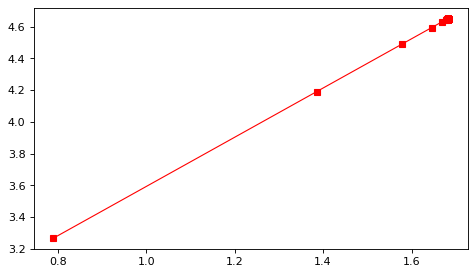

In [41]:
_, ax = plt.subplots(figsize=(7,4),dpi=80)

plt.plot(theta_path_sgd[:,0],theta_path_sgd[:,1],"r-s",linewidth=1,label="Stochastic")

## Polynomial Regression

In [42]:
import numpy.random as rnd

In [43]:
m = 100
X = 6 * rnd.rand(m,1) -3
y = 0.5 * X ** 2 + X + 2 + rnd.randn(m,1)

Text(0.5, 1.0, 'quadratic data plot')

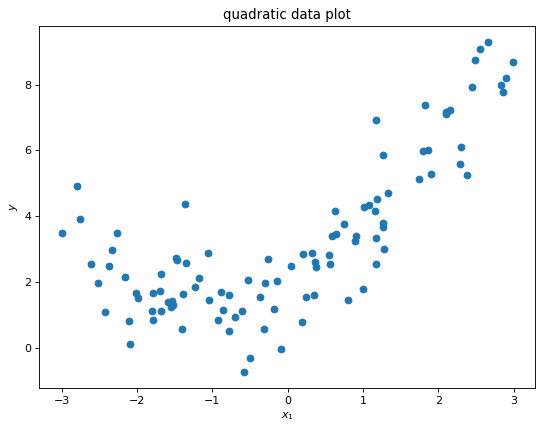

In [44]:
_,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.scatter(X,y)
ax.set(xlabel="$x_1$",ylabel="$y$")
ax.set_title("quadratic data plot")

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
poly_features = PolynomialFeatures(degree=2,include_bias=False)

In [47]:
X_poly = poly_features.fit_transform(X)

In [48]:
X_poly[0]

array([-1.80694558,  3.26505231])

In [49]:
lin_reg = LinearRegression()

In [50]:
lin_reg.fit(X_poly, y)

LinearRegression()

In [51]:
lin_reg.intercept_,lin_reg.coef_

(array([1.95257495]), array([[1.02476759, 0.50417279]]))

In [52]:
X_new = np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

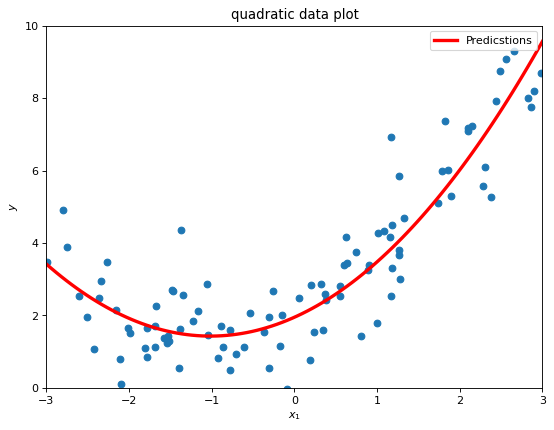

In [53]:
_,ax = plt.subplots(figsize=(8,6),dpi=80)
ax.scatter(X,y)
ax.plot(X_new,y_new,"r-",linewidth=3,label="Predicstions")
ax.set(xlabel="$x_1$",ylabel="$y$")
plt.legend()
ax.set_title("quadratic data plot")
plt.axis([-3, 3, 0, 10])
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Text(0.5, 1.0, 'High degree Polynomianls Plot')

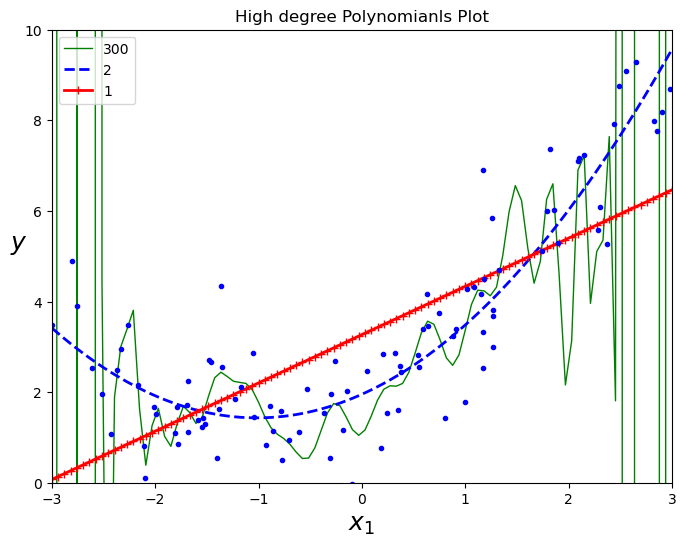

In [55]:
std_scaler = StandardScaler()
lin_reg = LinearRegression()
plt.figure(figsize=(8,6),dpi=100)
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    polynomial_regression = Pipeline([("poly_features", polybig_features),
                                      ("std_scaler", std_scaler),
                                      ("lin_reg", lin_reg)])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("High degree Polynomianls Plot")

In [56]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [57]:
def Plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=10)
    train_errors, val_errors = [], []
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size", fontsize=14)
    plt.ylabel("RMSE",fontsize=14)

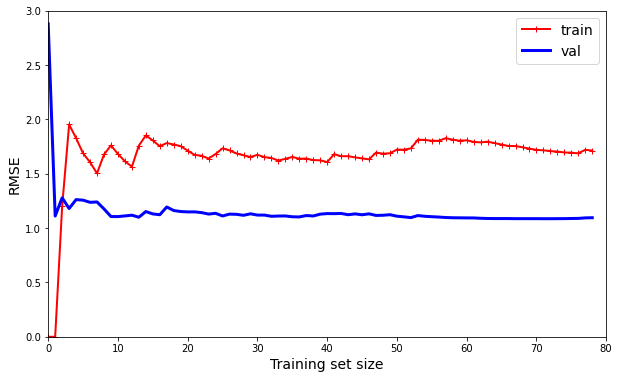

In [58]:
# learning curves of the plain Linear Regression model:
plt.figure(figsize=(10,6))
lin_reg = LinearRegression()
Plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()

In [59]:
from sklearn.pipeline import Pipeline

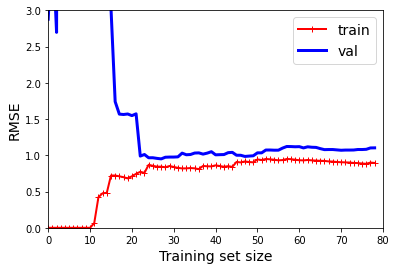

In [60]:
# the learning curves of a 10th-degree polynomial model on the same data
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression())
])

_, ax = plt.subplots(figsize=(6,4))
Plot_learning_curves(polynomial_regression,X,y)
ax.axis([0,80,0,3])# jumps very high to 4000
plt.show()

### Regularized models

In [61]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, SGDRegressor

In [62]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
y = 1 + 0.5 * X + np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

In [63]:
ridge_reg = Ridge(alpha=1, solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [64]:
ridge_reg = Ridge(alpha=1, solver="sag",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.5507201]])

`sag` uses a Stochastic Average Gradient descent, and ‘saga’ uses its improved, unbiased version named SAGA. Both methods also use an iterative procedure, and are often faster than other solvers when both n_samples and n_features are large. Note that ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

In [65]:
def plot_model(model_class,alphas,ax,polynomial=False,**model_kargs):
    styles = ("b-","g--","r:")
    
    for alpha,style in zip(alphas,styles):
        model = model_class(alpha,**model_kargs) if alpha > 0 else LinearRegression()
        if polynomial :
            model = Pipeline([
                ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                ("std_scaler",StandardScaler()),
                ("regul_reg",model),
            ])
        model.fit(X,y)
        y_new_regl = model.predict(X_new)
        ax.plot(X_new,y_new_regl,style,label=f"alpha = {alpha}")
    ax.plot(X,y,"b.",linewidth=3)
    ax.set(xlabel="$x_1$")
    ax.legend(loc="upper left",fontsize='medium')

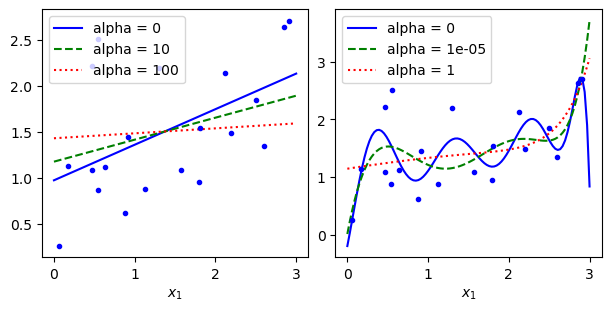

In [66]:
_,axes = plt.subplots(1,2,figsize=(6,3),
                      dpi=100,constrained_layout=True)

plot_model(Ridge,alphas=(0,10,100),ax = axes[0],random_state=42)
plot_model(Ridge,alphas=(0,10**-5,1),ax=axes[1],
           polynomial=True,random_state=42)
ax.set(ylabel="$y$")
plt.show()

In [67]:
# Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X,y)
lasso_reg.predict([[1.5]])

array([1.53788174])

In [68]:
# Elastic Net
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.54333232])

In [69]:
np.random.seed(42)
m =100
X = 6 * np.random.rand(m,1) - 3
y = 2 + X + 0.5 * X ** 2 + np.random.randn(m,1)
X_train, X_val, y_train, y_val = train_test_split(X[:50],y[:50].ravel(),
                                                 test_size=0.5,random_state=10)

### Early Stopping

In [70]:
from copy import deepcopy

In [71]:
poly_scaler = Pipeline(
    [
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ]
)
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(
    max_iter=1,
    tol=-np.infty,
    warm_start=True,
    penalty=None,
    learning_rate="constant",
    eta0=0.005,
    random_state=42,
)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # Continues where is left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

In [72]:
sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       warm_start=True,
                       penalty=None,
                       learning_rate="constant",
                       eta0=0.0005,
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train, y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])


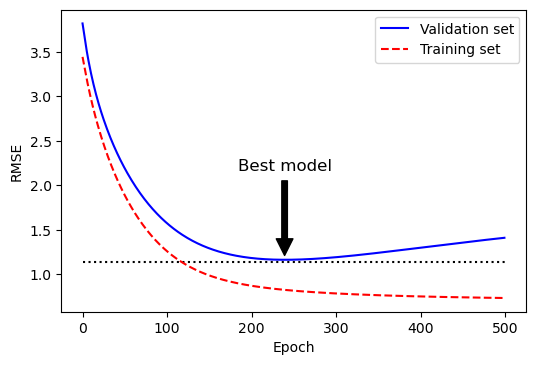

In [73]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.annotate(
    'Best model',
    xy=(best_epoch, best_val_rmse),
    xytext=(best_epoch, best_val_rmse + 1),
    ha="center",
    arrowprops=dict(facecolor='black', shrink=0.05),
    fontsize='large',
)

best_val_rmse -= 0.03
ax.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:")
ax.plot(np.sqrt(val_errors), "b-", label="Validation set")
ax.plot(np.sqrt(train_errors), "r--", label="Training set")
ax.legend(loc="upper right")
ax.set(xlabel="Epoch", ylabel="RMSE")

plt.show()



In [74]:
best_epoch,best_model

(239,
 SGDRegressor(eta0=0.005, learning_rate='constant', max_iter=1, penalty=None,
              random_state=42, tol=-inf, warm_start=True))

Try later: Lasso VS Ridge regularization

In [75]:
def make_mesh(xlims, ylims, h):
    x_min, x_max = xlims
    y_min, y_max = ylims
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, h),
                         np.linspace(y_min, y_max, h))
    return xx, yy

In [76]:
xlims = [-1, 3]
ylims = [-1.5, 1.5]

t1, t2 = make_mesh(xlims, ylims, h=500)
T = np.c_[t1.flatten(), t2.flatten()]

Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

In [77]:
def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2 / len(X) * X.T.dot(
            X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)

    return np.array(path)

In [78]:
def plot_grid(ax, path_N):
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.plot(0, 0, "ys")
    # ax.axis([t1a, t1b, t2a, t2b])
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")

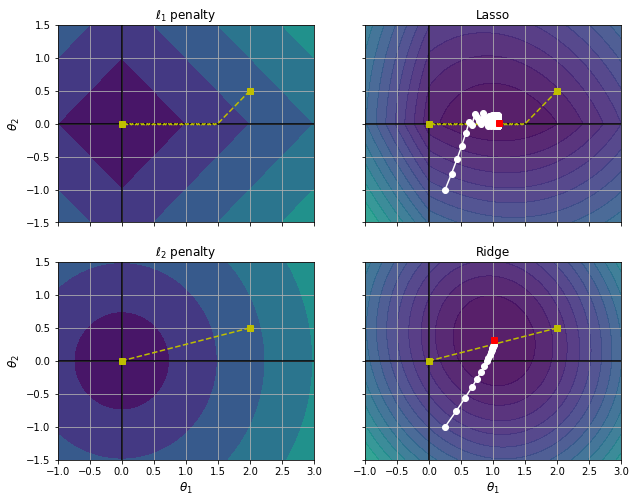

In [79]:
_, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

l1 = [2, 0]
l2 = [0, 2]
titles = ["Lasso", "Ridge"]
Ns = [N1, N2]

for ind, (N, l1, l2, title) in enumerate(zip(Ns, l1, l2, titles)):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2

    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) -
                                                     np.min(J)) + np.min(J)
    levelsJR = (np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) -
                                                      np.min(JR)) + np.min(JR)
    levelsN = np.linspace(0, np.max(N), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]),
                      Xr,
                      yr,
                      np.sign(l1) / 3,
                      np.sign(l2),
                      core=0)

    ax = axes[ind, 0]
    plot_grid(ax, path_N)
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.set_title(f"$ℓ_{ind + 1}$ penalty", fontsize='large')
    if ind == 1:
        ax.set_xlabel(r"$θ_1$", fontsize='large')
    ax.set_ylabel(r"$θ_2$", fontsize='large')

    ax = axes[ind, 1]
    plot_grid(ax, path_N)
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize='large')
    if ind == 1:
        ax.set_xlabel(r"$θ_1$", fontsize='large')

plt.show()

## Logistic Regression

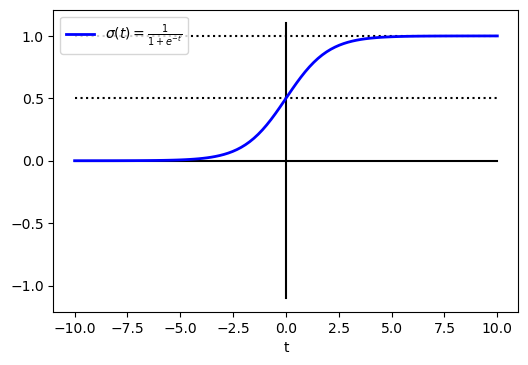

In [80]:
t = np.linspace(-10,10,100)
sig = 1 / (1 + np.exp(-t))

_,ax = plt.subplots(figsize=(6,4),dpi=100)

ax.plot([-10,10],[0,0],"k-")
ax.plot([-10,10],[0.5,0.5],"k:")
ax.plot([-10,10],[1,1],"k:")
ax.plot([0,0],[-1.1,1.1],"k-")
ax.plot(t,sig,"b-",lw=2,label=r"$σ(t) = \frac{1}{1 + e^{-t}}$")

ax.set(xlabel="t")
ax.legend(loc="upper left")
plt.show()

In [81]:
from sklearn import datasets

In [82]:
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename']

In [83]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [84]:
X = iris["data"][:,3:] # petal length
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0
#  lable 0,1:prepare for logistic regression

/var/folders/1q/m8l_wvxd5dl8kccgv4xrsxtr0000gn/T/ipykernel_38485/2751995458.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0


In [85]:
from sklearn.linear_model import LogisticRegression

In [86]:
log_reg = LogisticRegression(solver="lbfgs",random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42)

In [87]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

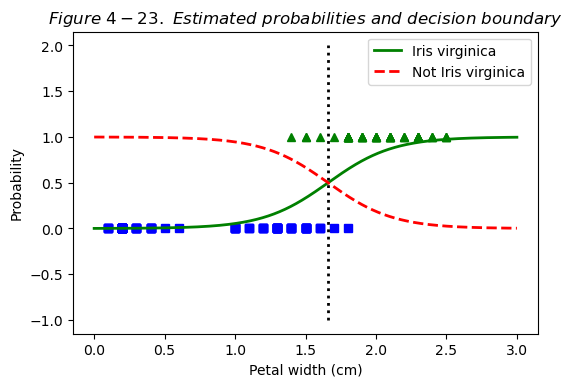

In [88]:
_, ax = plt.subplots(figsize=(6, 4), dpi=100)

ax.plot(X[y == 0], y[y == 0], "bs")
ax.plot(X[y == 1], y[y == 1], "g^")
ax.plot([decision_boundary, decision_boundary], [-1, 2], "k:", lw=2)
ax.plot(X_new, y_proba[:, 1], "g-", lw=2, label="Iris virginica")
ax.plot(X_new, y_proba[:, 0], "r--", lw=2, label="Not Iris virginica")
ax.set(
    xlabel="Petal width (cm)",
    ylabel="Probability",
    title="$Figure\ 4-23.\ Estimated\ probabilities\ and\ decision\ boundary$")
ax.legend()

In [89]:
decision_boundary

array([1.66066066])

In [90]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

Figure 4-24. Linear decision boundary

In [91]:
X = iris["data"][:,(2,3)] # petal lengh,petal width
y = (iris["target"] == 2).astype("int") # astype int : 0,1 for regressions

log_reg = LogisticRegression(solver="lbfgs", C = 10 ** 10,random_state=42)
log_reg.fit(X,y)

LogisticRegression(C=10000000000, random_state=42)

In [92]:
log_reg.intercept_

array([-45.27248302])

In [93]:
log_reg.coef_[0][1]

10.446811142229157

In [94]:
def make_mesh (xlims,ylims,h):
    x = np.arange(xlims[0],xlims[1],h)
    y = np.arange(ylims[0],ylims[1],h)
    return xx,yy

In [95]:
def make_zz(x0,x1):
    X_new = np.c_[x0.flatten(),x1.flatten()]
    y_proba = log_reg.predict_proba(X_new)
    zz = y_proba[:,1].reshape(x0.shape)
    return zz

In [96]:
x0,x1 = np.meshgrid(
    np.linspace(2.9,7,500).reshape(-1,1),
    np.linspace(0.8,2.7,200).reshape(-1,1)
)
X_new = np.c_[x0.ravel(),x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

In [97]:
# plot
## TypeError: 'QuadContourSet' object is not callable
# plt.figure(figsize=(10, 4))
# plt.plot(X[y == 0, 0], X[y == 0, 1], "bs")
# plt.plot(X[y == 1, 0], X[y == 1, 1], "g^")

# zz = y_proba[:, 1].reshape(x0.shape)
# contour = ax.contour(x0, x1, zz, cmap=plt.cm.brg)

# left_right = np.array([2.9, 7])
# boundary = -(log_reg.coef_[0][0] * left_right +
#              log_reg.intercept_[0]) / log_reg.coef_[0][1]

# plt.clabel(contour, inline=1, fontsize=12)
# plt.plot(left_right, boundary, "k--", lw=3)
# plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
# plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
# plt.xlabel("Petal length", fontsize=14)
# plt.ylabel("Petal width", fontsize=14)
# plt.axis([2.9, 7, 0.8, 2.7])
# plt.show()


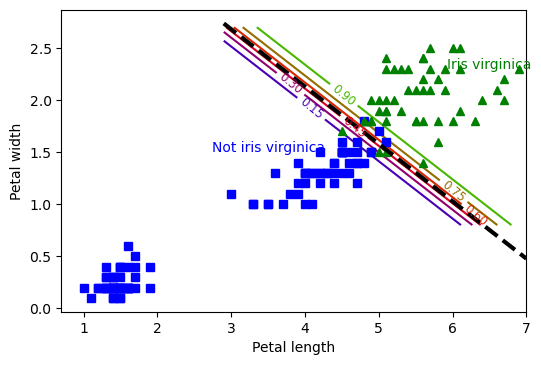

In [98]:
# v2xb
_,ax = plt.subplots(figsize=(6,4),dpi=100)

ax.plot(X[y == 0, 0], X[y == 0, 1], "bs")
ax.plot(X[y == 1, 0], X[y == 1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = ax.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right +
             log_reg.intercept_[0]) / log_reg.coef_[0][1]

ax.clabel(contour,inline=1,fontsize='small')
ax.plot(left_right,boundary,"k--",lw=3)
ax.text(3.5,1.5,"Not iris virginica",fontsize='medium',color="b",ha="center")
ax.text(6.5,2.3,"Iris virginica",fontsize='medium',color="g",ha="center")
ax.set(xlabel="Petal length",ylabel="Petal width")
plt.show()

### Softmax Regression

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers(Chap3).This is called $\textit{Softmax Regression, or Multinomial Logistic Regression.}$


$$
\hat{p_k} = σ(\bf{s(x)})_k = \frac{exp(s_k(\bf{x})}{∑_{j=1}^Kexp(s_j(\bf{x}))}
\tag{4-20}
$$

where:

$K$ is the number of classes

$\bf{s(x)}$ is a vector containing the scores of each class for the instance $\bf{x}$.

$σ(\bf{s(x)})_k$ is the estimated probability that the instance $\bf{x}$ belongs to the class $k$,given the scores of each class for the instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score), as shown in Equation 4-21:

$$
\hat{y} = arg\ \underset{k}{max}\ σ(\bf{s(x)})_k = arg\ \underset{k}{max}\ s_k(\bf{x})  = arg\ \underset{k}{max}\ ((\bf{θ}^{(k)})^⊤\bf{x})
$$

In [100]:
 X = iris["data"][:,(2,3)]  #Petal length, petal width.
 y = iris["target"] # all in , as mutiple regression

In [101]:
softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs",
                                 C=10,
                                 random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [102]:
from matplotlib.colors import ListedColormap

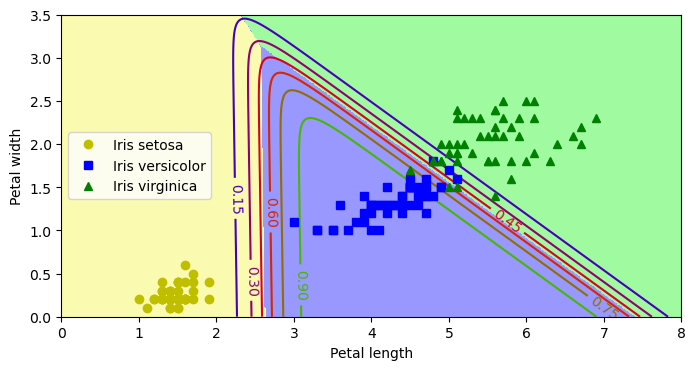

In [116]:
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])

_, ax = plt.subplots(figsize=(8, 4), dpi=100)

labels = ["Iris setosa", "Iris versicolor", "Iris virginica"]
styles = ["yo", "bs", "g^"]

for ind, (style, lb) in enumerate(zip(styles, labels)):
    ax.plot(X[y == ind, 0], X[y == ind, 1], style, label=lb)

ax.set(xlabel="Petal length", ylabel="Petal width")
ax.legend(loc="center left", fontsize="medium")

x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1))

X_new = np.c_[x0.flatten(), x1.flatten()]
y_predict = softmax_reg.predict(X_new)
zz = y_predict.reshape(x0.shape)

y_proba = softmax_reg.predict_proba(X_new)
zz1 = y_proba[:, 1].reshape(x0.shape)

ax.contourf(x0, x1, zz, cmap=custom_cmap)
contour = ax.contour(x0, x1, zz1, cmap=plt.cm.brg)
ax.clabel(contour, inline=True)
ax.set(label="$Figure 4-25. Softmax Regression decision boundaries$")
plt.show()